<a href="https://colab.research.google.com/github/Cehiim/boilerplate-sea-level-predictor/blob/main/sea_level_predictor_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [111]:
!git clone https://github.com/Cehiim/boilerplate-sea-level-predictor.git

fatal: destination path 'boilerplate-sea-level-predictor' already exists and is not an empty directory.


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Questions

## 1

In [113]:
df = pd.read_csv("boilerplate-sea-level-predictor/epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


## 2

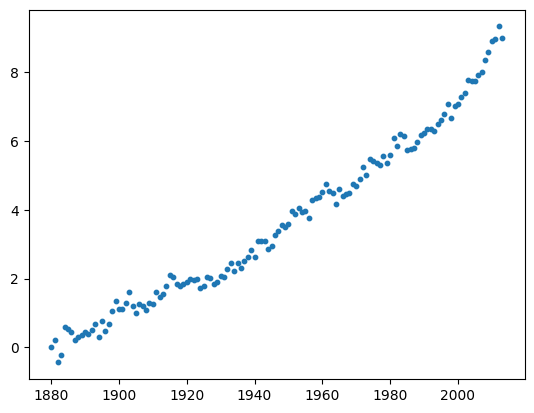

In [114]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

plt.scatter(x, y, s=10)
#plt.plot(df['Year'], df['CSIRO Adjusted Sea Level'], linestyle='-', color='red')

## 3

In [115]:
line = linregress(x, y)
line

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

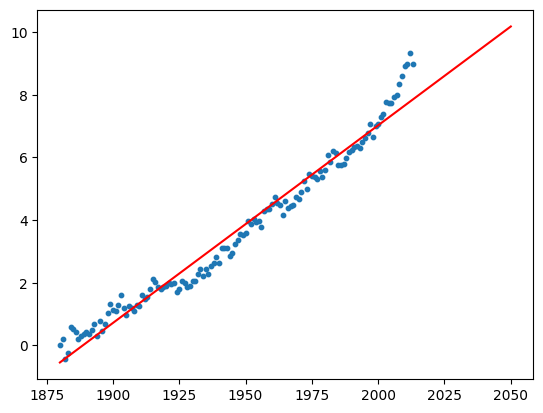

In [116]:
plt.scatter(x, y, s=10)

x_prediction = range(1880, 2051)
y_prediction = line.slope * x_prediction + line.intercept
plt.plot(x_prediction, y_prediction, linestyle='-', color='red')

## 4

In [117]:
filtered_df = df.loc[df['Year'] >= 2000]
filtered_df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [118]:
new_x = filtered_df['Year']
new_y = filtered_df['CSIRO Adjusted Sea Level']
new_line = linregress(new_x, new_y)
new_line

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

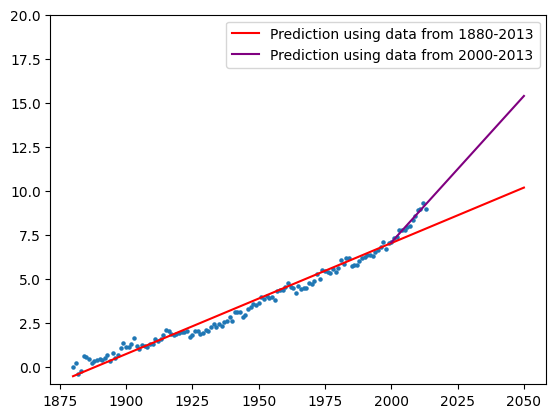

In [119]:
plt.scatter(x, y, s=5)

plt.plot(x_prediction, y_prediction, linestyle='-', color='red', label='Prediction using data from 1880-2013')

new_x_prediction = range(2000, 2051)
new_y_prediction = new_line.slope * new_x_prediction + new_line.intercept
plt.plot(new_x_prediction, new_y_prediction, linestyle='-', color='purple', label='Prediction using data from 2000-2013')
plt.ylim(-1, 20)
plt.legend()

## 5

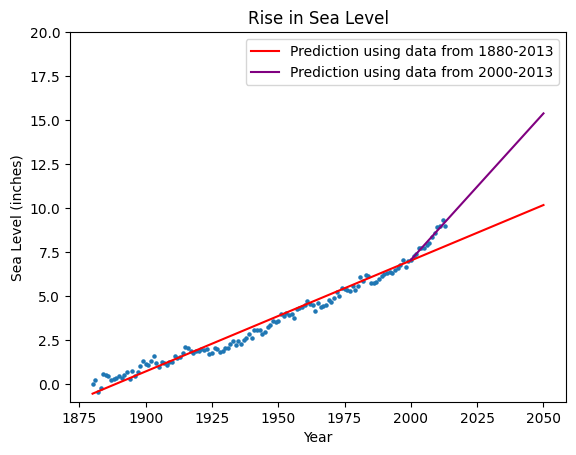

In [120]:
plt.scatter(x, y, s=5)

plt.plot(x_prediction, y_prediction, linestyle='-', color='red', label='Prediction using data from 1880-2013')

new_x_prediction = range(2000, 2051)
new_y_prediction = new_line.slope * new_x_prediction + new_line.intercept
plt.plot(new_x_prediction, new_y_prediction, linestyle='-', color='purple', label='Prediction using data from 2000-2013')
plt.ylim(-1, 20)
plt.legend()

plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.savefig('sea_level_plot.png')